# **Tugas 5 - Machine Learning**

Link Menuju Gdrive Google Collab

In [ ]:
print("")

#Import Dataset

Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression

Load Dataset Iris.csv to Notebook

In [ ]:
from google.colab import files
load_dataset = files.upload()

Saving iris.csv to iris (3).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(load_dataset['iris.csv']))

Read File

In [ ]:
data = pd.read_csv("iris.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Read File Menggunakan Import Dataset dari SckitLearn
# Disini saya lebih prefer menggunakan Pandas, agar lebih mudah mendrop Kolom dan Baris

from sklearn.datasets import load_iris
iris = load_iris()
print(iris)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
# Menghilangkan Baris dari 100 - 149
# Karena yang diperlukan hanya Setosa dan Vesicolour

i = 99
while(i<=148):
  i = i+1
  data.drop([i], axis=0, inplace=True)

# Alternatif drop bisa di drop dengan
"""
data.drop(data[data.species=='virginica'].index, inplace=True)
data.drop(columns=['sepal_width', 'petal_width'], inplace=True)
"""

# Menghilangkan Fitur sepal_width & petal_width

data.drop('sepal_width', axis=1, inplace=True)
data.drop('petal_width', axis=1, inplace=True)
data


,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa
...,...,...,...
95,5.7,4.2,versicolor
96,5.7,4.2,versicolor
97,6.2,4.3,versicolor
98,5.1,3.0,versicolor


Identifikasi Entry pada Dataset

In [ ]:
# Dapat dilihat bahwa features yang tadi sudah dihapus dan hanya tersisa feature_length dan species
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   petal_length  100 non-null    float64
 2   species       100 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


Soal 1 : Split data menjadi Train dan Test

In [ ]:
# Data dibagi menjadi Train dan Test, lalu ditunjukkan 
train,test = train_test_split(data, test_size = 0.2, random_state = 0)

In [ ]:
# Memperlihatkan bahwa dataset telah displit, dan masing2 kelas terbagi rata
print(train)
print(" ")
train["species"].value_counts()

    sepal_length  petal_length     species
43           5.0           1.6      setosa
62           6.0           4.0  versicolor
3            4.6           1.5      setosa
71           6.1           4.0  versicolor
45           4.8           1.4      setosa
..           ...           ...         ...
96           5.7           4.2  versicolor
67           5.8           4.1  versicolor
64           5.6           3.6  versicolor
47           4.6           1.4      setosa
44           5.1           1.9      setosa

[80 rows x 3 columns]
 


setosa        40
versicolor    40
Name: species, dtype: int64

In [ ]:
# Memperlihatkan bahwa dataset telah displit, dan masing2 kelas terbagi rata
test.info()
print(" ")
print(test)
print(" ")
test["species"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 26 to 8
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  20 non-null     float64
 1   petal_length  20 non-null     float64
 2   species       20 non-null     object 
dtypes: float64(2), object(1)
memory usage: 640.0+ bytes
 
    sepal_length  petal_length     species
26           5.0           1.6      setosa
86           6.7           4.7  versicolor
2            4.7           1.3      setosa
55           5.7           4.5  versicolor
75           6.6           4.4  versicolor
93           5.0           3.3  versicolor
16           5.4           1.3      setosa
73           6.1           4.7  versicolor
54           6.5           4.6  versicolor
95           5.7           4.2  versicolor
53           5.5           4.0  versicolor
92           5.8           4.0  versicolor
78           6.0           4.5  versicolor
13           4.3      

setosa        10
versicolor    10
Name: species, dtype: int64

In [ ]:
# mengubah versicolor dan setosa dengan 1 dan 0
data['species'] = data['species'].replace(['versicolor'],0)
data['species'] = data['species'].replace(['setosa'],1)

In [ ]:
data

,sepal_length,petal_length,species
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1
...,...,...,...
95,5.7,4.2,0
96,5.7,4.2,0
97,6.2,4.3,0
98,5.1,3.0,0


In [ ]:
# Displit dataset, yaitu Test = 0.2 dari 100 dan Train = 0.8 dari 100, dengan random_state = 0
# Sehingga masing2 kelas memiliki banyak Train dan Split yang sama

from sklearn.model_selection import train_test_split
X = data.drop(columns=['species'])
Y = data['species']
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
Y_train

43    1
62    0
3     1
71    0
45    1
     ..
96    0
67    0
64    0
47    1
44    1
Name: species, Length: 80, dtype: int64

In [ ]:
"""
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

print("Shape of x_train: ", X_train.shape)
print("Shape of y_train: ", Y_train.shape)
print("Shape of x_test: ", X_test.shape)
print("Shape of y_test: ", Y_test.shape)
"""

Soal 2 : Visualisasi Train Data

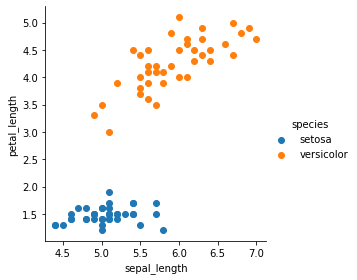

In [ ]:
sns.FacetGrid(train, hue="species", height=4).map(plt.scatter, "sepal_length", "petal_length").add_legend()

Soal 3 : Sigmoid Function

In [ ]:
# Theta = [0,0] , Karena hanya 2 fitur yang dipakai
theta = [0,0]

# Mencari Hasil dari Dot Product antara Theta dengan X_train, untuk dijadikan nilai Input pada Fungsi Sigmoid
dotp = np.dot(X_train,theta)
print(dotp)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
"""
# Fungsi dari Logistik Sigmoid
def logistic_sigmoid(x):
  sig = (1/(1 + np.exp(-x)))
  return sig

logistic_sigmoid_values = logistic_sigmoid(dotp)
print(logistic_sigmoid_values)
"""

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


In [ ]:
# Membuat Prediksi
def predict(X_train, theta):
  z = np.dot(X_train, theta)
  return logistic_sigmoid(z)

Soal 4 : Cost Function

In [ ]:
# Fungsi dari Cost

"""
# Atau bisa juga dengan
def cost_function(X_train, Y_train, theta):
    observations = len(Y_train)

    predictions = predict(X_train, theta)

    #Take the error when label=1
    class1_cost = -X_train*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-Y_train)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost

    ATAU

    def logistic_computeCost(theta, X_train, Y_train):
    m = len(X_train)
    
    # Perkalian Matrix
    h_theta = logistic_sigmoid(np.dot(X_train, theta))
    term1 = np.dot(-Y_train.T, np.log(h_theta))
    term2 = np.dot((1 - Y_train).T, np.log(1 - h_theta))
    return np.sum(term1 - term2) / m

    logistic_computeCost_value = logistic_computeCost(theta, X_train, Y_train)
    print(logistic_computeCost_value)
"""



Soal 5 : Gradient Descent

In [ ]:
n = len(train.columns)-1

def prepareData(data, n):

    # Tentukan x dan Y
    x = np.array(X.values)
    y = np.array(Y.values)
    theta = np.zeros((n+1, 1))
    return x, y, theta

x, y, theta = prepareData(train, n)

print('Dimeksi Matrix dari x, y dan theta')
print(x.shape, y.shape, theta.shape)


Dimeksi Matrix dari x, y dan theta
(100, 2) (100,) (6, 1)


In [ ]:
# Fungsi Gradient Descent
def gradient(X_train, Y_train, theta, lr):
    N = len(X_train)
    predictions = predict(X_train, theta)
    gradient = np.dot(X_train.T,  predictions - labels)
    gradient /= N
    gradient *= lr
    theta -= gradient

    return theta

Soal 6 : Logistic Regression Algorithm

In [ ]:
# Menggabungkan Fungsi-Fungsi diatas pada kelas Logisticregression
class LogisticRegression:

    # Inisialisasi Modelling
    def __init__(model, learning_rate=0.001, iter=100):
        model.learning_rate = learning_rate
        model.iter = iter
    
    # Inisialiasi
    def initialize(model, X_train):
        theta = np.zeros((np.shape(X_train)[1] + 1, 1))
        x = np.concatenate((np.ones((np.shape(X_train)[0], 1)), X_train), axis=1)
        return theta, x
    
    # Fungsi Sigmoid
    def sigmoid(model, z):
        sig = 1 / (1 + np.exp(-z))
        return sig

    # Funsi Cost
    def cost(model, X_train, Y_train, theta):
        h = model.calc_h(X_train, theta)
        cost0 = Y_train.T.dot(np.log(h))
        cost1 = (1 - Y_train).T.dot(np.log(1 - h))
        total_cost = -((cost1 + cost0)) / len(Y_train)
        return total_cost
    
    # Gradient Descent algorithm 
    def gradient(model, X_train, Y_train, theta):
        h = model.calc_h(X_train, theta)
        yp = np.reshape(Y_train, (len(Y_train), 1))
        gradient = np.dot(X_train.T, h - yp)
        return gradient

    # Menghting Nilai h
    def calc_h(model, X_train, theta):
        z = np.dot(X_train, theta)
        h = model.sigmoid(z)
        return h    
    
    # Training data      
    def fit(model, X_train, Y_train):
        theta, x = model.initialize(X_train)
        cost_list = np.zeros((model.iter),)
        for i in range(model.iter):
            gradient = model.gradient(x, Y_train, theta)
            theta = theta - model.learning_rate * gradient
            cost_list[i] = model.cost(x, Y_train, theta)
            
        model.theta = theta
        return cost_list
    
    # Membuat Prediksi Model
    def predict(model, X_train):
        x = model.initialize(X_train)[1]
        z = np.dot(x, model.theta)
        result = []
        for i in model.sigmoid(z):
            if i > 0.5:
                result.append(1)
            else:
                result.append(0)
        return result
    
    # Menghitung Akurasi
    def accuracy(X,y,theta):
      prediction = np.where(sigmoid(x, theta) >= 0.5, 1 ,0) 
      count = 0
      print("Test Data : ", y)
      print("Prediction: ", prediction)
      for i in range(prediction.size):
        if prediction[i] == y[i]: 
            count = count + 1
      accuracy = count/len(y)
      return accuracy

In [ ]:
logreg = LogisticRegression(learning_rate=0.001, iter=100)
theta, x = logreg.initialize(X_train)
h = logreg.calc_h(x, theta)

print(x)
print(" ")
print(h)

[[1.  5.  1.6]
 [1.  6.  4. ]
 [1.  4.6 1.5]
 [1.  6.1 4. ]
 [1.  4.8 1.4]
 [1.  5.3 1.5]
 [1.  4.6 1.4]
 [1.  5.7 4.1]
 [1.  5.8 3.9]
 [1.  6.8 4.8]
 [1.  5.  3.5]
 [1.  5.5 3.8]
 [1.  5.5 4.4]
 [1.  6.2 4.5]
 [1.  6.4 4.5]
 [1.  5.2 1.5]
 [1.  5.7 1.7]
 [1.  6.3 4.7]
 [1.  6.1 4.7]
 [1.  6.4 4.3]
 [1.  4.9 1.4]
 [1.  5.9 4.2]
 [1.  4.4 1.3]
 [1.  4.5 1.3]
 [1.  5.  1.4]
 [1.  5.7 1.5]
 [1.  5.1 1.4]
 [1.  5.  1.3]
 [1.  4.4 1.3]
 [1.  5.4 1.7]
 [1.  6.1 4.6]
 [1.  5.2 3.9]
 [1.  5.1 1.4]
 [1.  4.9 1.5]
 [1.  5.2 1.4]
 [1.  7.  4.7]
 [1.  4.8 1.6]
 [1.  5.  1.2]
 [1.  5.1 1.7]
 [1.  6.9 4.9]
 [1.  5.4 1.5]
 [1.  5.4 1.5]
 [1.  5.6 4.5]
 [1.  4.9 3.3]
 [1.  5.7 3.5]
 [1.  6.  4.5]
 [1.  5.2 1.5]
 [1.  5.4 4.5]
 [1.  5.8 1.2]
 [1.  5.5 4. ]
 [1.  5.1 1.5]
 [1.  4.7 1.6]
 [1.  5.  1.4]
 [1.  6.2 4.3]
 [1.  5.1 3. ]
 [1.  5.6 3.9]
 [1.  5.4 1.7]
 [1.  5.6 4.2]
 [1.  6.3 4.9]
 [1.  6.7 5. ]
 [1.  5.  1.6]
 [1.  4.9 1.5]
 [1.  5.5 3.7]
 [1.  5.1 1.6]
 [1.  5.1 1.5]
 [1.  6.7 4.4]
 [1.  6.6 

In [ ]:
def CostListFunct(X_train,Y_train):
  CostList = logreg.fit(X_train, Y_train)

In [ ]:
CostList

[0.66932704,
 0.64865669,
 0.62900295,
 0.61022977,
 0.59229129,
 0.57514706,
 0.55875826,
 0.54308757,
 0.52809922,
 0.513759,
 0.50003423,
 0.48689377,
 0.474308,
 0.46224874,
 0.45068927,
 0.43960423,
 0.4289696,
 0.41876262,
 0.40896178,
 0.39954671,
 0.39049816,
 0.38179794,
 0.37342886,
 0.36537467,
 0.35762003,
 0.35015043,
 0.3429522,
 0.33601238,
 0.32931875,
 0.32285977,
 0.3166245,
 0.31060264,
 0.30478441,
 0.29916059,
 0.29372243,
 0.28846169,
 0.28337052,
 0.27844152,
 0.27366766,
 0.2690423,
 0.26455912,
 0.26021215,
 0.2559957,
 0.25190439,
 0.2479331,
 0.24407698,
 0.24033141,
 0.23669199,
 0.23315457,
 0.22971516,
 0.22636998,
 0.22311544,
 0.2199481,
 0.21686471,
 0.21386215,
 0.21093744,
 0.20808776,
 0.20531039,
 0.20260276,
 0.19996239,
 0.19738694,
 0.19487415,
 0.19242186,
 0.19002801,
 0.18769063,
 0.18540783,
 0.1831778,
 0.18099881,
 0.1788692,
 0.17678737,
 0.17475179,
 0.17276101,
 0.17081361,
 0.16890825,
 0.16704362,
 0.16521849,
 0.16343165,
 0.16168196,

Soal 7 : Value of Theta(s)

In [ ]:
print(theta)

[[0.]
 [0.]
 [0.]]


Soal 8 : Accuracy Test

In [ ]:
# Desicion Boundary
def plot_decision_boundary(trues, falses):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    no_of_preds = len(trues) + len(falses)

    ax.scatter([i for i in range(len(trues))], trues, s=25, c='b', marker="o", label='Trues')
    ax.scatter([i for i in range(len(falses))], falses, s=25, c='r', marker="s", label='Falses')

    plt.legend(loc='upper right');
    ax.set_title("Decision Boundary")
    ax.set_xlabel('N/2')
    ax.set_ylabel('Predicted Probability')
    plt.axhline(.5, color='black')
    plt.show()

In [ ]:
 # Menghitung Akurasi
def accuracy(X,y,theta):
  prediction = np.where(sigmoid(x, theta) >= 0.5, 1 ,0) 
  count = 0
  print("Test Data : ", y)
  print("Prediction: ", prediction)
  for i in range(prediction.size):
    if prediction[i] == y[i]: 
      count = count + 1
      accuracy = count/len(y)
  return accuracy

sig = 1 / (1 + np.exp(-z))

print('Accuracy of the model:', accuracy(X_test,Y_test,theta))

NameError: ignored

Soal 9 : Visualisasi Cost Function

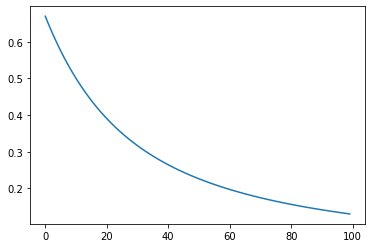

In [ ]:
plt.plot(range(100), CostList)